# RFM 분석
### RFM이란? 
Recency: 고객이 얼마나 최근에 상품을 구매했는가?
Frequency: 고객이 얼마나 자주 상품을 구매했는가?
Monetary: 고객이 상품 구매에 얼마나 많은 돈을 썼는가?
가중치를 고려해서 각 성분들로 고객을 분리하는 것
고객 그룹 하나를 세그먼트(Segment)라고 명한다

# 패키지 모듈 다운

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 데이터셋 로드

In [2]:
customer_df = pd.read_csv("C:\\Users\\chltm\\OneDrive\\문서\\GitHub\\DataStudy\\seungwoo\\datafile\\customer_data.csv", sep='\t')
df = pd.read_csv

In [3]:
customer_df.shape
# 꽤 양이 많은 데이터

(2240, 23)

In [4]:
customer_df.head()


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,...,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,...,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,...,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,...,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,...,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,...,5,6,5,0,0,0,0,0,0,11


In [5]:
pd.set_option('display.max_columns', None)
customer_df.head()


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [6]:
# set_option이란? 칼럼 ... 제한 수 해제
pd.set_option('display.max_columns', None)
customer_df.head()


,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,1965,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,1962,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,1973,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,1992,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,1989,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


In [7]:
customer_df.info()
# 결측치 존재 anuual_income 데이터 개수2240개에서 non-null데이터만 2216개

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2240 non-null   int64  
 1   signup_ym              2240 non-null   object 
 2   birth_year             2240 non-null   int64  
 3   annual_income          2216 non-null   float64
 4   marital_status         2240 non-null   object 
 5   children               2240 non-null   int64  
 6   recency                2240 non-null   int64  
 7   amount_alcohol         2240 non-null   int64  
 8   amount_fruit           2240 non-null   int64  
 9   amount_meat            2240 non-null   int64  
 10  amount_fish            2240 non-null   int64  
 11  amount_snack           2240 non-null   int64  
 12  amount_general         2240 non-null   int64  
 13  num_purchase_web       2240 non-null   int64  
 14  num_purchase_store     2240 non-null   int64  
 15  num_

In [8]:
customer_df.describe(include='all')
# 데이터 타입 전체 확인하기
# 숫자 아닌 데이터 타입까지 확인하기 위해서 시행

,ID,signup_ym,birth_year,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
count,2240.000000,2240,2240.000000,2.216000e+03,2240,2240.000000,2240.000000,2.240000e+03,2240.000000,2.240000e+03,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0
unique,NaN,24,NaN,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2021-12,NaN,NaN,배우자 있음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,111,NaN,NaN,1444,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5592.159821,NaN,1976.805804,6.792143e+07,NaN,0.950446,49.109375,3.951164e+05,34192.901786,2.170350e+05,48783.080357,35181.830357,57228.437500,4.084821,5.790179,2.325000,0.064286,0.013393,0.072768,0.074554,0.072768,0.149107,11.0
std,3246.662198,NaN,11.984069,3.272500e+07,NaN,0.751803,28.962453,4.375766e+05,51705.463894,2.934300e+05,71017.673224,53664.648034,67817.670589,2.778714,3.250958,1.932238,0.245316,0.114976,0.259813,0.262728,0.259813,0.356274,0.0
min,0.000000,NaN,1901.000000,2.249000e+06,NaN,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
25%,2828.250000,NaN,1967.000000,4.589390e+07,NaN,0.000000,24.000000,3.087500e+04,1300.000000,2.080000e+04,3900.000000,1300.000000,11700.000000,2.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
50%,5458.500000,NaN,1978.000000,6.679595e+07,NaN,1.000000,49.000000,2.255500e+05,10400.000000,8.710000e+04,15600.000000,10400.000000,31200.000000,4.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0
75%,8427.750000,NaN,1985.000000,8.907860e+07,NaN,1.000000,74.000000,6.555250e+05,42900.000000,3.016000e+05,65000.000000,42900.000000,72800.000000,6.000000,8.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,11.0


In [9]:
columns_object_dtype = customer_df.columns[customer_df.dtypes == 'object']
columns_object_dtype




Index(['signup_ym', 'marital_status'], dtype='object')

In [10]:
for col in columns_object_dtype:
    vlaues = sorted(customer_df[col].unique())
    print(f"{col}: {len(vlaues)}")
    print(vlaues)

# list.sort() 리스트형 메소드 데이터 타입이 리스트인 경우만 정렬 가능, 원본 값  수정 적용됨
# sorted(anytype) 다른 데이터 타입의 값도 정렬 가능, 원본 값은 그대로이고 정렬된 결과를 리턴함

signup_ym: 24
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09']
marital_status: 4
['미혼', '배우자 있음', '사별', '이혼']


In [11]:

for col in columns_object_dtype:
    unique_values = sorted(customer_df[col].unique())
    print(f'{col}: {len(unique_values)}개')
    print(unique_values, '\n')


# object 데이터 칼럼 확인
# sort정렬로 데이터 확인하자
    

signup_ym: 24개
['2020-10', '2020-11', '2020-12', '2021-01', '2021-02', '2021-03', '2021-04', '2021-05', '2021-06', '2021-07', '2021-08', '2021-09', '2021-10', '2021-11', '2021-12', '2022-01', '2022-02', '2022-03', '2022-04', '2022-05', '2022-06', '2022-07', '2022-08', '2022-09'] 

marital_status: 4개
['미혼', '배우자 있음', '사별', '이혼'] 



## annual_income 컬럼 결측값 처리하기


In [12]:
# isna : N/A 값 데이터가 존재 하지 않거나 오류로 읽을 수 없을 때
# sum : 개수 측정하기
customer_df.isna().sum()
# 24개의 결측치를 확인할 수 있음
# 결측치는 지우거나, 채우거나(평균으로)

ID                        0
signup_ym                 0
birth_year                0
annual_income            24
marital_status            0
children                  0
recency                   0
amount_alcohol            0
amount_fruit              0
amount_meat               0
amount_fish               0
amount_snack              0
amount_general            0
num_purchase_web          0
num_purchase_store        0
num_purchase_discount     0
promotion_1               0
promotion_2               0
promotion_3               0
promotion_4               0
promotion_5               0
promotion_6               0
revenue                   0
dtype: int64

In [13]:
customer_df = customer_df.dropna()
customer_df.isna().sum()

ID                       0
signup_ym                0
birth_year               0
annual_income            0
marital_status           0
children                 0
recency                  0
amount_alcohol           0
amount_fruit             0
amount_meat              0
amount_fish              0
amount_snack             0
amount_general           0
num_purchase_web         0
num_purchase_store       0
num_purchase_discount    0
promotion_1              0
promotion_2              0
promotion_3              0
promotion_4              0
promotion_5              0
promotion_6              0
revenue                  0
dtype: int64

# 출생 연도를 나이로 바꾸기

In [14]:
import datetime as dt
customer_df['birth_year'] = 2023 - customer_df['birth_year']

#customer_df = customer_df.rename(columns={'birth_year': 'age'})





In [15]:
customer_df = customer_df.rename(columns={'birth_year': 'age'})
customer_df.head()


,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,5,6,5,0,0,0,0,0,0,11


# 구매 금액 합계 및 구매 횟수 합계 계산

In [16]:
data_amount_total = (
    customer_df['amount_alcohol']
    + customer_df['amount_fruit']
    + customer_df['amount_meat']
    + customer_df['amount_fish']
    + customer_df['amount_snack']
    + customer_df['amount_general']
)
data_amount_total

0       2102100
1         35100
2       1008800
3         68900
4        548600
         ...   
2235    1743300
2236     577200
2237    1613300
2238    1095900
2239     223600
Length: 2216, dtype: int64

In [17]:
index_amount_general = customer_df.columns.get_loc('amount_general')


# insert 옆에 원하는 옆에 추가하는 가 get_loc

In [18]:
customer_df.insert(
    loc=index_amount_general + 1,
    column='amount_total',
    value=data_amount_total,
)
# df.insert(loc,column,value)
customer_df.head()


,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,0,0,0,0,0,0,11


In [19]:
num_purchase_total = (
    customer_df['num_purchase_web'] + customer_df['num_purchase_store'] + customer_df['num_purchase_discount']

)

index_purchase_discount = customer_df.columns.get_loc('num_purchase_discount')
# 16
customer_df.insert(loc=index_purchase_discount+1,column='num_purchase_total',value=num_purchase_total)


In [20]:
customer_df.head()

,ID,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6,revenue
0,5524,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1,11
1,2174,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0,11
2,4141,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0,11
3,6182,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0,11
4,5324,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0,11


## 불필요한 컬럼 제거하기

In [21]:
customer_df['revenue'].describe()
#v평균도 최소 최대값도 다 동일하다 큰 의미가 없음

count    2216.0
mean       11.0
std         0.0
min        11.0
25%        11.0
50%        11.0
75%        11.0
max        11.0
Name: revenue, dtype: float64

In [22]:
customer_df = customer_df.drop(columns=['ID', 'revenue'])
customer_df.head()
# 필요없는 칼럼 지우기 drop


,signup_ym,age,annual_income,marital_status,children,recency,amount_alcohol,amount_fruit,amount_meat,amount_fish,amount_snack,amount_general,amount_total,num_purchase_web,num_purchase_store,num_purchase_discount,num_purchase_total,promotion_1,promotion_2,promotion_3,promotion_4,promotion_5,promotion_6
0,2020-12,58,75579400.0,미혼,0,58,825500,114400,709800,223600,114400,114400,2102100,8,4,3,15,0,0,0,0,0,1
1,2022-06,61,60247200.0,미혼,2,38,14300,1300,7800,2600,1300,7800,35100,1,2,2,5,0,0,0,0,0,0
2,2021-11,50,93096900.0,배우자 있음,0,26,553800,63700,165100,144300,27300,54600,1008800,8,10,1,19,0,0,0,0,0,0
3,2022-05,31,34639800.0,배우자 있음,1,26,14300,5200,26000,13000,3900,6500,68900,2,4,2,8,0,0,0,0,0,0
4,2022-04,34,75780900.0,배우자 있음,1,94,224900,55900,153400,59800,35100,19500,548600,5,6,5,16,0,0,0,0,0,0


# 나이 분포 파악하기

In [23]:
plt.rc('font', family='NanumGothic')


Text(0, 0.5, '고객 수(명)')

findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
findfont: Font family 'NanumGothic' not found.
C:\Users\chltm\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44256 (\N{HANGUL SYLLABLE GO}) missing from current font.
  func(*args, **kwargs)
C:\Users\chltm\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44061 (\N{HANGUL SYLLABLE GAEG}) missing from current font.
  func(*args, **kwargs)
C:\Users\chltm\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
C:\Users\chltm\AppData\Roaming\Python\Python312\site-packages\IPython\core\events.py:82: UserWarnin

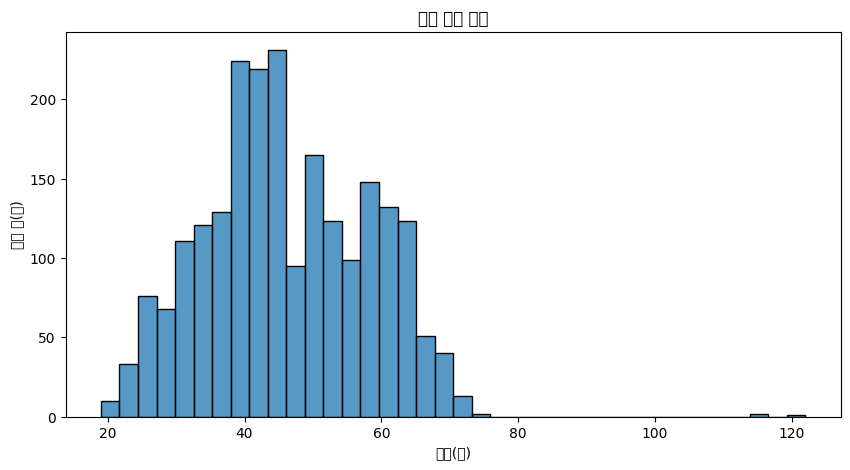

In [24]:
plt.rcParams['figure.figsize'] = (10, 5)
sns.histplot(data=customer_df['age'])
plt.title('고객 나이 분포')
plt.xlabel('나이(세)')
plt.ylabel('고객 수(명)')



# iqr 분포
# cut, qcut 종류 알아보기